In [36]:
import numpy as np
import pandas as pd
# made the date column as index column, and the date is not in correct format day is not there so parse the date
df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [37]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

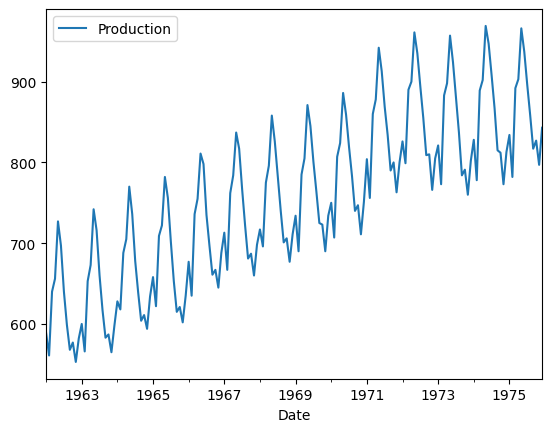

In [38]:
# Here i/p and o/p are Production
df.plot()  # its the plot function in pandas bcz only one column

In [39]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [40]:
# convert it into training and test datas
# normal splitting is not appropriate here. bcz in that the machine will randomly choose 70% training and 30% testing.
# lstm works by analysing previous datas so we cannot split like this

train = df.iloc[:156]  # first 156 rows for training
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [41]:
test = df.iloc[156:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [42]:
train.shape, test.shape

((156, 1), (12, 1))

In [43]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [44]:
# Seperating i/p and o/p (but it only has one column)
# for eg : if we define long =3 then
scaler_train[:15]

# array([[0.08653846], [0.01923077], [0.20913462] o/p of these 3 => [0.24759615],
#        [0.41826923], [0.34615385], [0.20913462] => [0.11057692],
#        etc

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462]])

In [45]:
# so to seperate data like this we use TimeseriesGenerator Library
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
n_input = 12
n_feature = 1
# creating object, i/p from scaler_train and we want o/p also from scaler_train, length = how much we need to split
generator = TimeseriesGenerator(scaler_train,scaler_train,length=n_input,batch_size=1)
generator

In [47]:
generator[0]
# first 12 values are i/ps and the last single array is the corresponding o/p

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [48]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [49]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(2,1)))
model.add(Dense(1)) # if activation function is not specified default it will be linear

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer='adam',loss='mse') # its not classification model its regression model thats y we didnt give accuracy as matrix

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
result = model.fit(generator,epochs=50)
result

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0573
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0168
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0038
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0032
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.003

In [53]:
result.history

{'loss': [0.03404105827212334,
  0.019716016948223114,
  0.014166048727929592,
  0.01155895832926035,
  0.00935515109449625,
  0.006554783321917057,
  0.004581444431096315,
  0.0038763293996453285,
  0.0044181994162499905,
  0.005178987979888916,
  0.0043138437904417515,
  0.003949507139623165,
  0.0037366615142673254,
  0.0034430460073053837,
  0.0031806190963834524,
  0.0033867047168314457,
  0.003661337774246931,
  0.0044726417399942875,
  0.005258364602923393,
  0.003382120979949832,
  0.002890480449423194,
  0.0038057880010455847,
  0.0038020098581910133,
  0.0030426469165831804,
  0.0035052523016929626,
  0.0037330735940486193,
  0.0033577224239706993,
  0.004474982153624296,
  0.003151270328089595,
  0.004284619819372892,
  0.0034583930391818285,
  0.00395969720557332,
  0.003349950537085533,
  0.003211414674296975,
  0.003200018312782049,
  0.002750624669715762,
  0.003254272509366274,
  0.002767655299976468,
  0.0036908367183059454,
  0.0031833997927606106,
  0.003148436546325

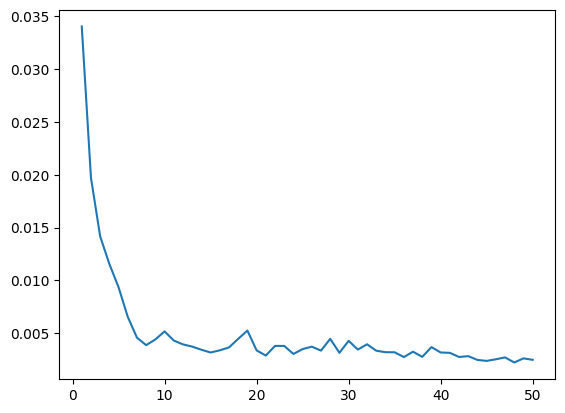

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),result.history['loss'])

In [55]:
scaler_test  # it contains the actual values

# To get the first value we have to give the last 12 observations
# And the machine will predict some value
# after that we have to compare the actual and predicted values
# To get the second value we need to pass the last 11 and the predicted last 1 value
# Look notion

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [56]:
last_train_batch = scaler_train[-12:] # last 12 observations
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [57]:
last_train_batch = last_train_batch.reshape(1,12,1) # like we used to do in cnn
y_pred1 = model.predict(last_train_batch)
y_pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


array([[0.6047735]], dtype=float32)

In [60]:
test_prediction = []
first_eval_batch = scaler_train[-12:]
current_batch = first_eval_batch.reshape(1,12,1)
for i in range(len(scaler_test)):
  # print(current_batch)
  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  # print(test_prediction)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [62]:
# print(test_prediction)
test_prediction

[array([0.6047735], dtype=float32),
 array([0.5936769], dtype=float32),
 array([0.7561635], dtype=float32),
 array([0.8292296], dtype=float32),
 array([0.9272003], dtype=float32),
 array([0.9174285], dtype=float32),
 array([0.8522241], dtype=float32),
 array([0.75183344], dtype=float32),
 array([0.6403173], dtype=float32),
 array([0.59252226], dtype=float32),
 array([0.5413667], dtype=float32),
 array([0.56465507], dtype=float32)]

In [63]:
# To get the origial value of the scaled data we need to take the inverse
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction

array([[804.58578491],
       [799.96960068],
       [867.56400681],
       [897.9595108 ],
       [938.71533203],
       [934.6502533 ],
       [907.52523041],
       [865.76271057],
       [819.37200546],
       [799.48926163],
       [778.20854568],
       [787.89650726]])

In [64]:
test  # actual test values

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [65]:
# Add the predited column into the data frame
test['Predicted_Value'] = true_prediction

<ipython-input-65-ccf6f74c2224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_Value'] = true_prediction


In [66]:
test

,Production,Predicted_Value
Date,,
1975-01-01,834,804.585785
1975-02-01,782,799.969601
1975-03-01,892,867.564007
1975-04-01,903,897.959511
1975-05-01,966,938.715332
1975-06-01,937,934.650253
1975-07-01,896,907.525230
1975-08-01,858,865.762711
1975-09-01,817,819.372005


In [67]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
percentage = mean_absolute_percentage_error(test['Production'],test['Predicted_Value'])
percentage

0.02241668986059088

In [68]:
r2 = r2_score(test['Production'],test['Predicted_Value'])
r2

0.8038644068012384